In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [31]:
import seaborn as sns

In [32]:
sns.set(style="whitegrid")

In [7]:
def Mutual_Information(x, y, bins):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    #print(len(x))
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_x.fit(x)
    discretizer_y.fit(y)
    x_disc = discretizer_x.transform(x).reshape(len(x))
    y_disc = discretizer_y.transform(y).reshape(len(y))
    #print(x_disc)
    #print(y_disc)
    #plt.plot(x_disc)
    n_mi = normalized_mutual_info_score(x_disc, y_disc)
    mi = mutual_info_score(x_disc, y_disc)
    return n_mi, mi

In [8]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
#file = 'agent_comments_testdf'
#READ THE SALES DATA - STATE

#df_sales = pd.read_feather(file + '_sentencecomposition.fea')
##df_sales = pd.read_feather(file + '_withsentiment.fea')
##df_sales = pd.read_feather(file+'_processed.fea')

In [9]:
df_sales_predictors = pd.read_feather(file + '_predictors_20220214.fea') 
df_Predictand = pd.read_feather(file + '_predictand_20220214.fea')

In [10]:
df_sales_predictors = df_sales_predictors.dropna(axis=1)

In [20]:
df_sales_predictors.columns

Index(['publicremarks_nltkpolarity_0', 'publicremarks_nltkpolarity_1',
       'publicremarks_nltkpolarity_2', 'publicremarks_nltkpolarity_3',
       'clean_publicremarks_nltkpolarity_0',
       'clean_publicremarks_nltkpolarity_1',
       'clean_publicremarks_nltkpolarity_2',
       'clean_publicremarks_nltkpolarity_3',
       'clean_publicremarks_additional_words_nltkpolarity_0',
       'clean_publicremarks_additional_words_nltkpolarity_1',
       ...
       'clean_publicremarks_lemmatized_embeddings_502',
       'clean_publicremarks_lemmatized_embeddings_503',
       'clean_publicremarks_lemmatized_embeddings_504',
       'clean_publicremarks_lemmatized_embeddings_505',
       'clean_publicremarks_lemmatized_embeddings_506',
       'clean_publicremarks_lemmatized_embeddings_507',
       'clean_publicremarks_lemmatized_embeddings_508',
       'clean_publicremarks_lemmatized_embeddings_509',
       'clean_publicremarks_lemmatized_embeddings_510',
       'clean_publicremarks_lemmatized_

In [30]:
df_sales_predictors.sentence_composition_

0          63.750000
1          47.222222
2          96.226415
3         392.307692
4          83.606557
             ...    
636144    182.142857
636145    188.888889
636146    242.857143
636147    170.000000
636148    170.000000
Name: sentence_composition_0, Length: 636149, dtype: float64

In [11]:
df_sales_predictors.shape

(636149, 3135)

In [12]:
predictor_array = df_sales_predictors.to_numpy()
transform_predictors = MinMaxScaler(feature_range=(-6, 6)).fit(predictor_array)
predictor_array_transformed = transform_predictors.transform(predictor_array)
#predictor_array_transformed2 = transform_predictors.transform(predictor_array)
#predictor_array_transformed = predictor_array

In [13]:
Predictand = df_Predictand['avmerror'].values

In [14]:
Predictand.shape

(636149,)

In [15]:
donde = ((Predictand >= -0.5 ) & (Predictand <= 0.5 ))

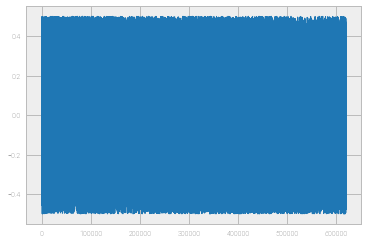

In [16]:
plt.plot(Predictand[donde])

In [17]:
Predictand = Predictand[donde]

In [18]:
predictor_array_transformed = predictor_array_transformed[donde, :]

In [ ]:
array = predictor_array_transformed

In [ ]:
predictor_array_transformed.T.shape

In [ ]:
cov_1 = np.dot(array.T, array) 
print(cov_1.shape)


In [ ]:
from scipy import linalg as la
e_vals_1, e_vecs_1 = la.eig (cov_1)

In [ ]:
sum_evals_1 = np.sum(e_vals_1)
var_exp_1 = (e_vals_1 / sum_evals_1) * 100

In [ ]:
plt.plot(var_exp_1[0:5])

In [ ]:
plt.plot(np.cumsum(var_exp_1)[0:300])

In [ ]:
pc_mat_1 = np.dot(predictor_array_transformed, e_vecs_1.T)

In [ ]:
pc_mat_2 = np.dot(predictor_array_transformed, e_vecs_1)

In [ ]:
pc_mat_1.shape

In [ ]:
pc_mat_2.shape

In [ ]:
plt.plot(pc_mat)

In [ ]:
plt.plot(pc_mat_2[:,2700],Predictand,'o')
plt.ylim(-4,5)

In [ ]:
plt.hist(Predictand,bins=100)

In [ ]:
df_sales_predictors.columns[2700]

In [19]:
from scipy import stats

correlations = np.zeros(df_sales_predictors.shape[0])
mutual_info = np.zeros(df_sales_predictors.shape[0])


for ii in range(df_sales_predictors.shape[0]-1):
    corr_temp = stats.pearsonr(predictor_array_transformed[:,ii],Predictand)[0]
    mi_tem = Mutual_Information(predictor_array_transformed[:,ii],Predictand, 100)
    correlations[ii] = corr_temp
    mutual_info[ii] = mi_tem[0]
    print(ii,df_sales_predictors.columns[ii], corr_temp, mi_tem)
    

0 publicremarks_nltkpolarity_0 0.03472953081541106 (0.0027529434037401584, 0.009914922768215196)
1 publicremarks_nltkpolarity_1 -0.008779952920405502 (0.0021971745739264464, 0.005940133265240186)
2 publicremarks_nltkpolarity_2 0.02501241690523215 (0.0019354895264405466, 0.007519361513567456)
3 publicremarks_nltkpolarity_3 -0.023135557655169323 (0.0019033555692700196, 0.007371427067016253)
4 clean_publicremarks_nltkpolarity_0 0.03185725223127624 (0.0026576406500292533, 0.009568314296371807)
5 clean_publicremarks_nltkpolarity_1 0.006631917125444912 (0.0020164764676334477, 0.0054071298204993005)
6 clean_publicremarks_nltkpolarity_2 0.021535175026185325 (0.0020222004085625393, 0.00797973406494533)
7 clean_publicremarks_nltkpolarity_3 -0.023052203445611215 (0.002004285280731504, 0.007885249906610218)
8 clean_publicremarks_additional_words_nltkpolarity_0 0.0305344833674869 (0.0025748426553651614, 0.009324872841975106)
9 clean_publicremarks_additional_words_nltkpolarity_1 0.007126744275320771

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 0 is constant and will be replaced with 0.
  "replaced with 0." % jj)


60 sentence_composition_6 nan (0.0, 0.0)
61 sentence_composition_7 0.09676213600039754 (0.0037213022581410304, 0.01299520690324828)
62 sentence_composition_8 0.08415421673755344 (0.003285042082943371, 0.011660471888613275)
63 publicremarks_embeddings_0 -0.03156301463079314 (0.002425594617427074, 0.009606748849725403)
64 publicremarks_embeddings_1 0.0029728003889283286 (0.0025171711145950595, 0.00991251837368178)
65 publicremarks_embeddings_2 -0.031529673862237276 (0.002285013740452212, 0.009044639119860053)
66 publicremarks_embeddings_3 -0.10478506876501327 (0.00366983361376538, 0.014420800323438033)
67 publicremarks_embeddings_4 0.013441892521577679 (0.0019906721972457117, 0.008060618121428807)
68 publicremarks_embeddings_5 0.059681080791694555 (0.002311089216891157, 0.009626078340571454)
69 publicremarks_embeddings_6 0.07858830033540672 (0.0028120904439861713, 0.011478288640829833)
70 publicremarks_embeddings_7 -0.018336852745360295 (0.0020066814501431608, 0.007941767227439875)
71 pu

145 publicremarks_embeddings_82 0.03379432637415766 (0.004387484028164288, 0.016548989349568888)
146 publicremarks_embeddings_83 -0.03606662457487229 (0.002688326753224303, 0.0109685643092782)
147 publicremarks_embeddings_84 -0.028869286085402894 (0.0022342935181658063, 0.009251217788662704)
148 publicremarks_embeddings_85 -0.03839524965470219 (0.002095828712362897, 0.008588927982533912)
149 publicremarks_embeddings_86 0.006819542052447198 (0.002029711473856347, 0.008290286762264454)
150 publicremarks_embeddings_87 0.01636062602098276 (0.0024352151395188788, 0.009685311715477842)
151 publicremarks_embeddings_88 0.00041161134447020083 (0.002019366416689597, 0.007982188859791852)
152 publicremarks_embeddings_89 0.026422623286688474 (0.0021316076784769263, 0.008918382129975068)
153 publicremarks_embeddings_90 -0.018262006497837557 (0.002062805903914549, 0.008576945078790432)
154 publicremarks_embeddings_91 0.07439762161484212 (0.002647647038476846, 0.011035439367607537)
155 publicremarks_

228 publicremarks_embeddings_165 0.03518251798184715 (0.0027106638961575382, 0.010533443103583479)
229 publicremarks_embeddings_166 -0.0064211005116593025 (0.004202001540464327, 0.014290556124703735)
230 publicremarks_embeddings_167 0.007610640402332444 (0.001913848917312339, 0.007894108700932797)
231 publicremarks_embeddings_168 -0.011993568856797965 (0.002086717266766843, 0.008368857378669093)
232 publicremarks_embeddings_169 -0.012967969997008815 (0.002451402968758321, 0.009684087449780658)
233 publicremarks_embeddings_170 0.012603638028181133 (0.0020468060025553136, 0.008532164183097426)
234 publicremarks_embeddings_171 0.04491765745204453 (0.003476662884645318, 0.013892193948994349)
235 publicremarks_embeddings_172 0.04452186728693717 (0.0024318142924024686, 0.009983687123744013)
236 publicremarks_embeddings_173 -0.05040931890291195 (0.002816836493536249, 0.01074809949623359)
237 publicremarks_embeddings_174 -0.02673352232494388 (0.0020427636268184795, 0.008358577272169218)
238 pu

311 publicremarks_embeddings_248 0.04868588411936068 (0.0020850197894451113, 0.008382092988201695)
312 publicremarks_embeddings_249 0.0576336356486402 (0.0031674537172595185, 0.012410259480120218)
313 publicremarks_embeddings_250 -0.05420747237470481 (0.002442917478580272, 0.009810637058679402)
314 publicremarks_embeddings_251 -0.012731661236724869 (0.0020384879055192436, 0.008375797207967715)
315 publicremarks_embeddings_252 -0.028128901973975245 (0.0020731727228546887, 0.008561709556223589)
316 publicremarks_embeddings_253 0.05059932470792135 (0.0021667719808892323, 0.008936400921553067)
317 publicremarks_embeddings_254 0.10128384922320258 (0.003390164819220517, 0.013664439965562828)
318 publicremarks_embeddings_255 -0.006214298262984835 (0.001746379741982218, 0.0071035736347104615)
319 publicremarks_embeddings_256 -0.08087089102663828 (0.0027982106290564343, 0.011653395250855897)
320 publicremarks_embeddings_257 0.004859167731660631 (0.004168661561151182, 0.013925748783251032)
321 p

394 publicremarks_embeddings_331 0.0358264791869575 (0.0021598524931105622, 0.008834302311157597)
395 publicremarks_embeddings_332 0.005562986202130068 (0.0020391458264131398, 0.008447526463469749)
396 publicremarks_embeddings_333 -0.014842713070291008 (0.0022249227952635593, 0.00874626839262712)
397 publicremarks_embeddings_334 0.02589039694416891 (0.002269592153465735, 0.008843140568307702)
398 publicremarks_embeddings_335 -0.01097909938042159 (0.0020044037877310055, 0.00834860203991733)
399 publicremarks_embeddings_336 0.0215992026189676 (0.0025507224610908995, 0.010554750725665621)
400 publicremarks_embeddings_337 0.0442579628196879 (0.002253808127018301, 0.009448697977352758)
401 publicremarks_embeddings_338 -0.0016658219695448752 (0.001908285467271225, 0.00781819045093288)
402 publicremarks_embeddings_339 -0.05415281282914187 (0.0022626239682990777, 0.009191944274215207)
403 publicremarks_embeddings_340 -0.031187510085271822 (0.0018980733344562194, 0.007805062124718757)
404 publi

477 publicremarks_embeddings_414 0.023473519380898446 (0.0022271113050651155, 0.00886252833615051)
478 publicremarks_embeddings_415 -0.07987079775382726 (0.003237653912941282, 0.013178530394447071)
479 publicremarks_embeddings_416 -0.07191105387772358 (0.0029927637894061852, 0.011797820272858743)
480 publicremarks_embeddings_417 -0.03598224335019703 (0.002553961405689706, 0.010246525101996353)
481 publicremarks_embeddings_418 0.019509853520006514 (0.0021489194151841457, 0.008928238012419498)
482 publicremarks_embeddings_419 -0.003668114532517855 (0.0019593134032163764, 0.008154153115228421)
483 publicremarks_embeddings_420 -0.01727444301642707 (0.00239768820674656, 0.009618393172389331)
484 publicremarks_embeddings_421 0.0418110756838605 (0.0023193381762722305, 0.009557689311552911)
485 publicremarks_embeddings_422 0.0771340636753992 (0.0025969353806966043, 0.010504835271120852)
486 publicremarks_embeddings_423 -0.0023628757163487507 (0.00182976463382237, 0.007605877685334643)
487 publ

560 publicremarks_embeddings_497 -0.01437440280223758 (0.0022718449077613083, 0.009358616944707437)
561 publicremarks_embeddings_498 -0.03921101252242799 (0.0024335800570024265, 0.010038709918066503)
562 publicremarks_embeddings_499 0.02831155490356545 (0.00214919898940892, 0.008997507780784748)
563 publicremarks_embeddings_500 -0.05007186852215436 (0.0022215185254846675, 0.009245046488982034)
564 publicremarks_embeddings_501 0.11754431755756638 (0.0036307077158625085, 0.015054886467723464)
565 publicremarks_embeddings_502 -0.04588893110904137 (0.002985800139584492, 0.01176903804910991)
566 publicremarks_embeddings_503 -0.044921113923334186 (0.0034139784867167314, 0.011559087131712296)
567 publicremarks_embeddings_504 -0.013110590424959968 (0.002740587917668947, 0.01054791040185003)
568 publicremarks_embeddings_505 -0.00979154144528805 (0.001961213552624233, 0.008088465045713691)
569 publicremarks_embeddings_506 0.004277953656703916 (0.00220949619928991, 0.008732677900808703)
570 publi

640 clean_publicremarks_embeddings_65 -0.006834749882551992 (0.0020265148698567, 0.007918457804224815)
641 clean_publicremarks_embeddings_66 -0.019248662559915836 (0.002560683102169832, 0.009920311020289941)
642 clean_publicremarks_embeddings_67 -0.002525758806260807 (0.002884086257110418, 0.010755570110075038)
643 clean_publicremarks_embeddings_68 0.010898388978046637 (0.0019508832673948689, 0.008151693814109903)
644 clean_publicremarks_embeddings_69 0.015530635367713942 (0.0024791485842901952, 0.009596618007235647)
645 clean_publicremarks_embeddings_70 -0.07041232610119429 (0.0029129825802622217, 0.012161605764596694)
646 clean_publicremarks_embeddings_71 -0.004347260338532047 (0.002187784729181528, 0.00898819798461105)
647 clean_publicremarks_embeddings_72 0.03738058992167644 (0.00256074473829179, 0.010307959784012171)
648 clean_publicremarks_embeddings_73 0.018872435322344824 (0.002840571256539377, 0.011143352396707686)
649 clean_publicremarks_embeddings_74 -0.06062548918481768 (0.

719 clean_publicremarks_embeddings_144 -0.022896348217674715 (0.002465923018729779, 0.009821744000470572)
720 clean_publicremarks_embeddings_145 -0.009975605424744623 (0.0023463993587421236, 0.009091289966876508)
721 clean_publicremarks_embeddings_146 0.03539195708116684 (0.0030036674460140796, 0.012084846546564363)
722 clean_publicremarks_embeddings_147 0.04702303848059932 (0.0025006033523712096, 0.009990921602992428)
723 clean_publicremarks_embeddings_148 0.0434633840437266 (0.004344153470094258, 0.015555124986056728)
724 clean_publicremarks_embeddings_149 0.03338318733147412 (0.003339145087069703, 0.013465931261865773)
725 clean_publicremarks_embeddings_150 -0.04060967577722375 (0.0023442805680104184, 0.009687738091411206)
726 clean_publicremarks_embeddings_151 -0.04624987819601098 (0.0037505052068161735, 0.013960089359955505)
727 clean_publicremarks_embeddings_152 -0.04340675081050985 (0.0022037124952382693, 0.008709973390960983)
728 clean_publicremarks_embeddings_153 0.01408316053

797 clean_publicremarks_embeddings_222 0.0025466996333819527 (0.0029726124661145813, 0.01111522577661782)
798 clean_publicremarks_embeddings_223 -0.010605623659440247 (0.0020179675659167495, 0.008321011746125064)
799 clean_publicremarks_embeddings_224 -0.07144474608640435 (0.0028487085632089484, 0.011405264193113992)
800 clean_publicremarks_embeddings_225 -0.08880461403384869 (0.0033869389007646824, 0.012471506119758594)
801 clean_publicremarks_embeddings_226 0.03060447174215723 (0.0022166349723990045, 0.008998346971397897)
802 clean_publicremarks_embeddings_227 -0.021241500349283262 (0.0023109325353780426, 0.009175030948972235)
803 clean_publicremarks_embeddings_228 -0.09587263014534675 (0.003667512393509677, 0.013541648732468924)
804 clean_publicremarks_embeddings_229 -0.024280342211003756 (0.002418589802829568, 0.00965021848638238)
805 clean_publicremarks_embeddings_230 -0.05442302403824468 (0.002564724664058246, 0.010606386638947352)
806 clean_publicremarks_embeddings_231 0.0197779

875 clean_publicremarks_embeddings_300 0.041569200883240294 (0.002630405098697361, 0.01026842630565172)
876 clean_publicremarks_embeddings_301 -0.0748527205863006 (0.0025302754999541356, 0.010518387409250794)
877 clean_publicremarks_embeddings_302 0.03942108239319489 (0.0022594528735493963, 0.008761228700476844)
878 clean_publicremarks_embeddings_303 -0.009755749140509253 (0.0020839368985084857, 0.008563933292437044)
879 clean_publicremarks_embeddings_304 0.0017882142865291812 (0.0038497464014477655, 0.015136357441212167)
880 clean_publicremarks_embeddings_305 -0.014413996911324403 (0.0019704180455606605, 0.0081651670864737)
881 clean_publicremarks_embeddings_306 0.018704429876496273 (0.0029811551760802924, 0.011553026503024155)
882 clean_publicremarks_embeddings_307 -0.05877257165579193 (0.002256908833888201, 0.009347005784156044)
883 clean_publicremarks_embeddings_308 0.046906301566384756 (0.0021485129091993356, 0.008924026796899347)
884 clean_publicremarks_embeddings_309 -0.02636598

953 clean_publicremarks_embeddings_378 -0.031566621270099945 (0.0023767936663359785, 0.009234100829239412)
954 clean_publicremarks_embeddings_379 0.005999100703173408 (0.0028199245013943897, 0.010800222877822879)
955 clean_publicremarks_embeddings_380 0.08370484327837521 (0.0028954669809871107, 0.01215942168546019)
956 clean_publicremarks_embeddings_381 0.06620556637703051 (0.0027933597724074323, 0.011681099682502485)
957 clean_publicremarks_embeddings_382 -0.05774393141369359 (0.0029886843456317894, 0.012085124320197269)
958 clean_publicremarks_embeddings_383 0.010377002431253187 (0.0019168328135641616, 0.008010169334838935)
959 clean_publicremarks_embeddings_384 0.00815219590213063 (0.0020236772124606795, 0.00831550713897735)
960 clean_publicremarks_embeddings_385 -0.02433544022083341 (0.003149336147629886, 0.011491992671564134)
961 clean_publicremarks_embeddings_386 0.001829656939079647 (0.0030512164466707627, 0.01062416603796)
962 clean_publicremarks_embeddings_387 0.03686966750605

1031 clean_publicremarks_embeddings_456 0.003132719379686311 (0.002210747795172391, 0.008547512357226911)
1032 clean_publicremarks_embeddings_457 0.0708062845866566 (0.002760865629462272, 0.010676967996376725)
1033 clean_publicremarks_embeddings_458 -0.013580464168127908 (0.0023403565675156465, 0.00978751009122506)
1034 clean_publicremarks_embeddings_459 -0.07708406709666846 (0.0026451896648604116, 0.010855187451918007)
1035 clean_publicremarks_embeddings_460 0.06090785332873507 (0.0033586885886294706, 0.01366055051255704)
1036 clean_publicremarks_embeddings_461 0.022201474749569915 (0.002313945948521366, 0.009310761433442186)
1037 clean_publicremarks_embeddings_462 0.017580815557873997 (0.002354654773569039, 0.009470531426373031)
1038 clean_publicremarks_embeddings_463 -0.0018326458620023676 (0.0034915875272215563, 0.012192096357346839)
1039 clean_publicremarks_embeddings_464 -0.031492212113395535 (0.0021766809866667325, 0.008989341288134448)
1040 clean_publicremarks_embeddings_465 -0

1106 clean_publicremarks_additional_words_embeddings_19 0.05275164942100763 (0.0023018630293163305, 0.009314850358221842)
1107 clean_publicremarks_additional_words_embeddings_20 0.06734371003620707 (0.0026427308673982546, 0.010968174787546834)
1108 clean_publicremarks_additional_words_embeddings_21 -0.04093425274884738 (0.002312612232435779, 0.009668890447144774)
1109 clean_publicremarks_additional_words_embeddings_22 0.010560461928201958 (0.002636342436422972, 0.01001464626516377)
1110 clean_publicremarks_additional_words_embeddings_23 0.05150352636741403 (0.0028840208257465564, 0.011621522209928944)
1111 clean_publicremarks_additional_words_embeddings_24 -0.04076721439734573 (0.0023283458370136297, 0.009584277646291717)
1112 clean_publicremarks_additional_words_embeddings_25 0.03255603641137242 (0.0020881226467990514, 0.00859818451654189)
1113 clean_publicremarks_additional_words_embeddings_26 0.005169038474113615 (0.002050231467820889, 0.00859770244378883)
1114 clean_publicremarks_a

1173 clean_publicremarks_additional_words_embeddings_86 0.008958443316914755 (0.002140716068022298, 0.008758649253470054)
1174 clean_publicremarks_additional_words_embeddings_87 0.026512383595389374 (0.002441441973684496, 0.009813420504478509)
1175 clean_publicremarks_additional_words_embeddings_88 -0.006508272286015103 (0.0018113415533251949, 0.007325638470930761)
1176 clean_publicremarks_additional_words_embeddings_89 0.006576188445979077 (0.0019949196345789228, 0.008319834942022755)
1177 clean_publicremarks_additional_words_embeddings_90 0.00806772129895132 (0.0019644749024916273, 0.008208938478651858)
1178 clean_publicremarks_additional_words_embeddings_91 0.07394945143968801 (0.0026146076100621216, 0.01087266790195306)
1179 clean_publicremarks_additional_words_embeddings_92 -0.015831269195212203 (0.002387504102287105, 0.009868721842979631)
1180 clean_publicremarks_additional_words_embeddings_93 0.07543631235397073 (0.0027147737628344638, 0.011349890754808004)
1181 clean_publicrema

1240 clean_publicremarks_additional_words_embeddings_153 0.02038837708846633 (0.001957101011776365, 0.008221951214903891)
1241 clean_publicremarks_additional_words_embeddings_154 -0.07048088026607345 (0.003043637553096712, 0.012598682919403213)
1242 clean_publicremarks_additional_words_embeddings_155 0.06346942636960186 (0.0025400458068153787, 0.01036541473156452)
1243 clean_publicremarks_additional_words_embeddings_156 0.10811285946200512 (0.0037704761375450396, 0.015426036388142857)
1244 clean_publicremarks_additional_words_embeddings_157 -0.04347227149663458 (0.0027454720473163736, 0.010830619661051786)
1245 clean_publicremarks_additional_words_embeddings_158 -0.03504681483174843 (0.0022677480601851646, 0.009475801604959382)
1246 clean_publicremarks_additional_words_embeddings_159 0.026733100095906032 (0.0025485957365548387, 0.01062626057072775)
1247 clean_publicremarks_additional_words_embeddings_160 -0.046176049939295444 (0.0034089224997511628, 0.012126997402049752)
1248 clean_pub

1307 clean_publicremarks_additional_words_embeddings_220 0.027963394319905042 (0.0020417769511015143, 0.008259582178579417)
1308 clean_publicremarks_additional_words_embeddings_221 0.008669059968609923 (0.002033660429604321, 0.008256789644779555)
1309 clean_publicremarks_additional_words_embeddings_222 -0.003237944801801693 (0.002665220125724213, 0.010088437306709322)
1310 clean_publicremarks_additional_words_embeddings_223 -0.007485923094574889 (0.0020094883755651014, 0.008333901556489514)
1311 clean_publicremarks_additional_words_embeddings_224 -0.07033699610582306 (0.0028163995354477216, 0.011177002012667366)
1312 clean_publicremarks_additional_words_embeddings_225 -0.07426155295088864 (0.00286944759374771, 0.010764519814859957)
1313 clean_publicremarks_additional_words_embeddings_226 0.02481260436224384 (0.002129117445937994, 0.008624334268761392)
1314 clean_publicremarks_additional_words_embeddings_227 -0.02779330615237736 (0.0023186550323815672, 0.009187429005276424)
1315 clean_p

1374 clean_publicremarks_additional_words_embeddings_287 0.04390920858745707 (0.0021879961453301093, 0.009099955912090016)
1375 clean_publicremarks_additional_words_embeddings_288 -0.01957641019609853 (0.0026047250325374506, 0.010328236990982701)
1376 clean_publicremarks_additional_words_embeddings_289 -0.02706950675069723 (0.00236466808997461, 0.00975425277281119)
1377 clean_publicremarks_additional_words_embeddings_290 0.014653815560492361 (0.0023373763148509274, 0.009233727400948565)
1378 clean_publicremarks_additional_words_embeddings_291 0.027255518647270657 (0.002723294556138352, 0.010277746321331927)
1379 clean_publicremarks_additional_words_embeddings_292 0.016531626036032594 (0.0027797243036673473, 0.010493525755305568)
1380 clean_publicremarks_additional_words_embeddings_293 0.017714290623658913 (0.0023521323607023042, 0.009696559949983325)
1381 clean_publicremarks_additional_words_embeddings_294 -0.05444695300820825 (0.002892232584923578, 0.011419997642171477)
1382 clean_pub

1441 clean_publicremarks_additional_words_embeddings_354 0.06608002299882995 (0.004919453210779732, 0.02034664118676291)
1442 clean_publicremarks_additional_words_embeddings_355 -0.014588275446992118 (0.003108289900224684, 0.012813997164266223)
1443 clean_publicremarks_additional_words_embeddings_356 -0.03517661701857677 (0.0031418812993386884, 0.011818581408470481)
1444 clean_publicremarks_additional_words_embeddings_357 -0.007597572593633375 (0.001909094454405901, 0.00798363209983482)
1445 clean_publicremarks_additional_words_embeddings_358 -0.05374702657340921 (0.00218021467729291, 0.00899433066089618)
1446 clean_publicremarks_additional_words_embeddings_359 -0.03333303540800175 (0.002402277948231478, 0.009544009740340125)
1447 clean_publicremarks_additional_words_embeddings_360 0.08600552512755372 (0.0032308384617807727, 0.012479257220652084)
1448 clean_publicremarks_additional_words_embeddings_361 0.07681008260550465 (0.0028918728340864867, 0.012072650916188817)
1449 clean_publicr

1508 clean_publicremarks_additional_words_embeddings_421 0.03730061437467294 (0.002386101567155134, 0.009858007322783913)
1509 clean_publicremarks_additional_words_embeddings_422 0.07798968145839648 (0.002719880303110023, 0.010909729399824947)
1510 clean_publicremarks_additional_words_embeddings_423 0.020350907292499366 (0.0018575527300235095, 0.007737183604612298)
1511 clean_publicremarks_additional_words_embeddings_424 -0.053046702228834855 (0.0023562439693271355, 0.009495240145725083)
1512 clean_publicremarks_additional_words_embeddings_425 0.05624853882588626 (0.002286578468290256, 0.00932070622363719)
1513 clean_publicremarks_additional_words_embeddings_426 -0.01102249956968125 (0.0020994843572691825, 0.008720868396526204)
1514 clean_publicremarks_additional_words_embeddings_427 0.02592847397592713 (0.002098217639241604, 0.008702989255958847)
1515 clean_publicremarks_additional_words_embeddings_428 -0.022157852611139322 (0.001996887769699817, 0.008344050210014175)
1516 clean_publi

1575 clean_publicremarks_additional_words_embeddings_488 -0.036338538761543894 (0.0024495995970808763, 0.010208459664092432)
1576 clean_publicremarks_additional_words_embeddings_489 0.03264252804011198 (0.002790470794162283, 0.010797061348172701)
1577 clean_publicremarks_additional_words_embeddings_490 -0.010297689493758888 (0.0034474729188415745, 0.01428095584504327)
1578 clean_publicremarks_additional_words_embeddings_491 -0.027416086169626614 (0.002062875569767921, 0.008575811804242117)
1579 clean_publicremarks_additional_words_embeddings_492 -0.03865713014523356 (0.002011860346313389, 0.008388969945213574)
1580 clean_publicremarks_additional_words_embeddings_493 -0.03481888698503583 (0.0019801654966474327, 0.00818743863761984)
1581 clean_publicremarks_additional_words_embeddings_494 -0.03270008912765804 (0.0024235443358155526, 0.009756942227423604)
1582 clean_publicremarks_additional_words_embeddings_495 -0.003438880978854009 (0.002181803087592927, 0.00915336110254114)
1583 clean_p

1646 clean_publicremarks_nopunct_embeddings_47 -0.025201639356833234 (0.0020424422739093984, 0.008532395594802775)
1647 clean_publicremarks_nopunct_embeddings_48 0.06948344155151139 (0.003443736283562959, 0.01367516870506202)
1648 clean_publicremarks_nopunct_embeddings_49 -0.038192302083284085 (0.0023661976665354124, 0.009907248640294655)
1649 clean_publicremarks_nopunct_embeddings_50 -0.036032605054658266 (0.0025323000954850924, 0.009700245627143882)
1650 clean_publicremarks_nopunct_embeddings_51 -0.006385232528345559 (0.0021955631884275355, 0.008620239616528197)
1651 clean_publicremarks_nopunct_embeddings_52 -0.035107991269240406 (0.003539076217221344, 0.011862235932471057)
1652 clean_publicremarks_nopunct_embeddings_53 0.051971978928589485 (0.0022826526994396577, 0.009511013788802612)
1653 clean_publicremarks_nopunct_embeddings_54 0.0024394405203488597 (0.0023840976713548987, 0.009817643739761803)
1654 clean_publicremarks_nopunct_embeddings_55 -0.050831263663142556 (0.00277715998314

1719 clean_publicremarks_nopunct_embeddings_120 0.029977489828825903 (0.0025276499067435217, 0.010222614673620093)
1720 clean_publicremarks_nopunct_embeddings_121 0.02159708923313141 (0.002313896598095819, 0.009600477224012896)
1721 clean_publicremarks_nopunct_embeddings_122 -0.04034221781142661 (0.0021957450924535793, 0.009123165339097817)
1722 clean_publicremarks_nopunct_embeddings_123 0.053686424279312715 (0.0025929096749839377, 0.010743760781788332)
1723 clean_publicremarks_nopunct_embeddings_124 -0.03378042192472018 (0.001985047694577299, 0.008204218054476117)
1724 clean_publicremarks_nopunct_embeddings_125 0.010418859203065707 (0.0019718418889349654, 0.008256503136095533)
1725 clean_publicremarks_nopunct_embeddings_126 -0.014589134413523244 (0.002385498684967046, 0.008716143400416695)
1726 clean_publicremarks_nopunct_embeddings_127 -0.005385699147434972 (0.0017943838780899173, 0.0072654202511706605)
1727 clean_publicremarks_nopunct_embeddings_128 -0.07867608024396779 (0.002895873

1791 clean_publicremarks_nopunct_embeddings_192 -0.05021101585292133 (0.0038698198741764413, 0.014373079854933437)
1792 clean_publicremarks_nopunct_embeddings_193 -0.0723796364270913 (0.0047181434896878425, 0.016227958632104134)
1793 clean_publicremarks_nopunct_embeddings_194 -0.01083028813694246 (0.0022345651109540155, 0.009079604280981552)
1794 clean_publicremarks_nopunct_embeddings_195 -0.06640398035695827 (0.002891177801305615, 0.011130348573336384)
1795 clean_publicremarks_nopunct_embeddings_196 -0.02181745218459809 (0.002453493400925628, 0.009450686107595169)
1796 clean_publicremarks_nopunct_embeddings_197 0.0613224274875905 (0.0025361959338047286, 0.010209345710830982)
1797 clean_publicremarks_nopunct_embeddings_198 0.0014295763655222374 (0.0019038981310671623, 0.007926176740562833)
1798 clean_publicremarks_nopunct_embeddings_199 0.015115388008739333 (0.001705409404093399, 0.007009482955077808)
1799 clean_publicremarks_nopunct_embeddings_200 -0.022229543007213793 (0.002757110577

1863 clean_publicremarks_nopunct_embeddings_264 0.11709687659523364 (0.0036150934313043132, 0.014554789864684854)
1864 clean_publicremarks_nopunct_embeddings_265 -0.06643134663536107 (0.0024635419633496406, 0.010277204007907926)
1865 clean_publicremarks_nopunct_embeddings_266 0.05231710220968475 (0.002558203917405279, 0.009881909552150287)
1866 clean_publicremarks_nopunct_embeddings_267 -0.0021008637154739883 (0.0021125407358167023, 0.008450884958707345)
1867 clean_publicremarks_nopunct_embeddings_268 -0.06035759295483088 (0.002509761395594301, 0.010399311810923784)
1868 clean_publicremarks_nopunct_embeddings_269 0.04678682700471232 (0.0033833413365863033, 0.013671577949782581)
1869 clean_publicremarks_nopunct_embeddings_270 -0.014099153031068557 (0.0020956715344714965, 0.008079298980256111)
1870 clean_publicremarks_nopunct_embeddings_271 0.045904864556116955 (0.003211217042631249, 0.011643958270618725)
1871 clean_publicremarks_nopunct_embeddings_272 -0.024539733436505003 (0.0026676396

1935 clean_publicremarks_nopunct_embeddings_336 0.019764403684298014 (0.0028992987243227886, 0.011841778388987593)
1936 clean_publicremarks_nopunct_embeddings_337 0.04489189793718348 (0.002258297952224831, 0.009474047509390725)
1937 clean_publicremarks_nopunct_embeddings_338 0.0013482695952665013 (0.0019218483941444223, 0.007942649730732547)
1938 clean_publicremarks_nopunct_embeddings_339 -0.05498489159742188 (0.002416711123989629, 0.009826979114534822)
1939 clean_publicremarks_nopunct_embeddings_340 -0.04170500007988548 (0.0020726480819424032, 0.008440237583157236)
1940 clean_publicremarks_nopunct_embeddings_341 -0.004299531529652266 (0.0019401942925186416, 0.008001593399562756)
1941 clean_publicremarks_nopunct_embeddings_342 0.07600559686533648 (0.0028488183851629553, 0.011645948670996002)
1942 clean_publicremarks_nopunct_embeddings_343 -0.03259203351890775 (0.0036549447895726683, 0.014241038637919772)
1943 clean_publicremarks_nopunct_embeddings_344 -0.008231182813689147 (0.002452033

2007 clean_publicremarks_nopunct_embeddings_408 0.028482657549858084 (0.0025288548716466174, 0.009719679559539325)
2008 clean_publicremarks_nopunct_embeddings_409 0.049240595413621774 (0.0028965743001468486, 0.010940627072218354)
2009 clean_publicremarks_nopunct_embeddings_410 0.06509432571484283 (0.0031774009825381224, 0.011572388777346072)
2010 clean_publicremarks_nopunct_embeddings_411 0.010231272347545629 (0.004104456753674974, 0.014022250942466015)
2011 clean_publicremarks_nopunct_embeddings_412 -0.015374780382871635 (0.002162834800766521, 0.00888851046120769)
2012 clean_publicremarks_nopunct_embeddings_413 0.04112910311872189 (0.0023081816629882917, 0.009654672674663073)
2013 clean_publicremarks_nopunct_embeddings_414 0.021120189418909335 (0.0020707146561744047, 0.008360971979057653)
2014 clean_publicremarks_nopunct_embeddings_415 -0.07832186722339929 (0.0031720083409924075, 0.012839838972298985)
2015 clean_publicremarks_nopunct_embeddings_416 -0.06995383440138428 (0.003046494746

2079 clean_publicremarks_nopunct_embeddings_480 -0.016338432545714075 (0.0025553929129388114, 0.010129384109918087)
2080 clean_publicremarks_nopunct_embeddings_481 0.031001294685464812 (0.0018444122965989931, 0.007569701084380317)
2081 clean_publicremarks_nopunct_embeddings_482 0.00034066434129255126 (0.002298576690476478, 0.009348179300316553)
2082 clean_publicremarks_nopunct_embeddings_483 0.037048137911492425 (0.0026464462193739177, 0.010780051026593102)
2083 clean_publicremarks_nopunct_embeddings_484 -0.08728071604149186 (0.003118835359227668, 0.012832372309384901)
2084 clean_publicremarks_nopunct_embeddings_485 0.022244951605302474 (0.002178015239065286, 0.009020876090461507)
2085 clean_publicremarks_nopunct_embeddings_486 -0.006587159014750118 (0.0019127371156787208, 0.007564283729347819)
2086 clean_publicremarks_nopunct_embeddings_487 0.06042933320151456 (0.002397754699215676, 0.009883400748084015)
2087 clean_publicremarks_nopunct_embeddings_488 -0.025963364940175263 (0.00231342

2152 clean_publicremarks_stemmed_embeddings_41 -0.024094084157051564 (0.002789399026279577, 0.011423319112159316)
2153 clean_publicremarks_stemmed_embeddings_42 -0.022918109493160026 (0.002054765493275392, 0.008321595566101788)
2154 clean_publicremarks_stemmed_embeddings_43 -0.02450415803899808 (0.00202925665486586, 0.00821829570393972)
2155 clean_publicremarks_stemmed_embeddings_44 -0.04433058928208929 (0.0032085491976005516, 0.01124685929285612)
2156 clean_publicremarks_stemmed_embeddings_45 0.0010744813123610365 (0.0028088066510880876, 0.010686570158830608)
2157 clean_publicremarks_stemmed_embeddings_46 0.02785352842537013 (0.002171243994059364, 0.00831645770253801)
2158 clean_publicremarks_stemmed_embeddings_47 -0.04807069689795734 (0.0020925474788028617, 0.008650500690589633)
2159 clean_publicremarks_stemmed_embeddings_48 0.04378299199001045 (0.0027662202069538345, 0.011285266847752795)
2160 clean_publicremarks_stemmed_embeddings_49 -0.044335430729757395 (0.0028869779061150695, 0.

2225 clean_publicremarks_stemmed_embeddings_114 0.051100114884205045 (0.0022405906820126887, 0.009266604692889849)
2226 clean_publicremarks_stemmed_embeddings_115 -0.06974340931967991 (0.0035972347998072434, 0.01362978904939081)
2227 clean_publicremarks_stemmed_embeddings_116 0.03194253289840359 (0.0019504501706978452, 0.008111834061747071)
2228 clean_publicremarks_stemmed_embeddings_117 -0.015487921239127983 (0.002419552544804008, 0.009265116040884609)
2229 clean_publicremarks_stemmed_embeddings_118 -0.026413236315605815 (0.0021509678441494354, 0.008735589781049775)
2230 clean_publicremarks_stemmed_embeddings_119 0.0756720691768417 (0.0026699918287397873, 0.011138782529909613)
2231 clean_publicremarks_stemmed_embeddings_120 0.04441392957583384 (0.002411007362151958, 0.00995923944764819)
2232 clean_publicremarks_stemmed_embeddings_121 0.02740381153593984 (0.0030031258635705325, 0.012326779597360352)
2233 clean_publicremarks_stemmed_embeddings_122 -0.002538345249251709 (0.00189156463658

2297 clean_publicremarks_stemmed_embeddings_186 -0.051061032598230735 (0.0023467167435163652, 0.009781744671277216)
2298 clean_publicremarks_stemmed_embeddings_187 -0.03898455368883695 (0.002000035438712921, 0.008050173306928709)
2299 clean_publicremarks_stemmed_embeddings_188 0.03319547947500946 (0.0019731412400301185, 0.008074276718523085)
2300 clean_publicremarks_stemmed_embeddings_189 -0.031429078179553906 (0.0023622593651118707, 0.009491946996013084)
2301 clean_publicremarks_stemmed_embeddings_190 -0.008923285120134981 (0.0023016889208401494, 0.009587584731993799)
2302 clean_publicremarks_stemmed_embeddings_191 0.025617489426278995 (0.0020494169009971034, 0.008273106956425351)
2303 clean_publicremarks_stemmed_embeddings_192 -0.0271122919127964 (0.0031044101735817125, 0.01168000888674858)
2304 clean_publicremarks_stemmed_embeddings_193 -0.07029094916112062 (0.0048435351606478634, 0.016739113686546223)
2305 clean_publicremarks_stemmed_embeddings_194 -0.04226031453735922 (0.002289174

2369 clean_publicremarks_stemmed_embeddings_258 0.033517559989302864 (0.0019641528690832466, 0.008105494273323218)
2370 clean_publicremarks_stemmed_embeddings_259 0.04112660464394123 (0.0026609592853067947, 0.01060466699485458)
2371 clean_publicremarks_stemmed_embeddings_260 -0.07383672583654982 (0.0028025654114121673, 0.010982748193002304)
2372 clean_publicremarks_stemmed_embeddings_261 -0.046495868155606156 (0.0023896483355304006, 0.009629963875725425)
2373 clean_publicremarks_stemmed_embeddings_262 -0.03301200613463043 (0.0021654373398583473, 0.008762321040112889)
2374 clean_publicremarks_stemmed_embeddings_263 -0.004280525498558964 (0.002111043949926194, 0.008761409881730997)
2375 clean_publicremarks_stemmed_embeddings_264 0.07953595165178215 (0.0025913559583500526, 0.010615679238422106)
2376 clean_publicremarks_stemmed_embeddings_265 -0.07767139818610802 (0.0026173328406442096, 0.010868320058318854)
2377 clean_publicremarks_stemmed_embeddings_266 0.037223498468807396 (0.0024299506

2441 clean_publicremarks_stemmed_embeddings_330 0.05989162079453419 (0.0026102801829742356, 0.010792783359166974)
2442 clean_publicremarks_stemmed_embeddings_331 0.027977416532565948 (0.002511417753353104, 0.01046865364874314)
2443 clean_publicremarks_stemmed_embeddings_332 0.009543371312214952 (0.002072396655430127, 0.008541834311794633)
2444 clean_publicremarks_stemmed_embeddings_333 0.010535967098973401 (0.0020343701743758442, 0.007971701081581566)
2445 clean_publicremarks_stemmed_embeddings_334 0.021374642134885474 (0.002500036346648282, 0.009339016974570596)
2446 clean_publicremarks_stemmed_embeddings_335 -0.02427899097719764 (0.0019303313882516597, 0.008009644084907536)
2447 clean_publicremarks_stemmed_embeddings_336 0.022326930184666985 (0.0028760392256823772, 0.01152275303382145)
2448 clean_publicremarks_stemmed_embeddings_337 0.06631684715624796 (0.0025065564846212672, 0.01049121948059204)
2449 clean_publicremarks_stemmed_embeddings_338 -0.007129712471157164 (0.002033604755708

2513 clean_publicremarks_stemmed_embeddings_402 -0.036566524140001416 (0.0020576353800237186, 0.008435048109591253)
2514 clean_publicremarks_stemmed_embeddings_403 0.07402609184890584 (0.0025486171349120507, 0.010443520494084212)
2515 clean_publicremarks_stemmed_embeddings_404 0.07204427785961184 (0.0024693834154461912, 0.010123373339277503)
2516 clean_publicremarks_stemmed_embeddings_405 0.04231982162695136 (0.0022574448202276713, 0.009166689475400728)
2517 clean_publicremarks_stemmed_embeddings_406 -0.07138127612257038 (0.002850349056649046, 0.011164741106286864)
2518 clean_publicremarks_stemmed_embeddings_407 0.018896455374060567 (0.0024746811333279375, 0.01011905578950886)
2519 clean_publicremarks_stemmed_embeddings_408 0.02128665359576361 (0.0020276843628117634, 0.007876921290212717)
2520 clean_publicremarks_stemmed_embeddings_409 0.026121811482018448 (0.002346410946638263, 0.008804903876560173)
2521 clean_publicremarks_stemmed_embeddings_410 0.06711861771025689 (0.002441761380929

2585 clean_publicremarks_stemmed_embeddings_474 0.008830439849370377 (0.001862441214549463, 0.007687051698029669)
2586 clean_publicremarks_stemmed_embeddings_475 -0.006916712533993376 (0.0020417593802488417, 0.008497280507399792)
2587 clean_publicremarks_stemmed_embeddings_476 0.006114669147190046 (0.0018930168635144004, 0.007754211747165699)
2588 clean_publicremarks_stemmed_embeddings_477 -0.09725002708007942 (0.003460349810416183, 0.014263642914927661)
2589 clean_publicremarks_stemmed_embeddings_478 -0.023225805889495018 (0.0023714057511678975, 0.009579218845088798)
2590 clean_publicremarks_stemmed_embeddings_479 -0.06532873817937364 (0.00271610237831867, 0.011154051363291926)
2591 clean_publicremarks_stemmed_embeddings_480 -0.02658894198405062 (0.0025861711541231404, 0.010217574833523337)
2592 clean_publicremarks_stemmed_embeddings_481 0.05498515805797841 (0.0020682573466064423, 0.0084360907178734)
2593 clean_publicremarks_stemmed_embeddings_482 -0.041564260255354445 (0.002370807776

2657 clean_publicremarks_lemmatized_embeddings_34 -0.01682898957304566 (0.0019137745821719112, 0.00794913798320815)
2658 clean_publicremarks_lemmatized_embeddings_35 0.0960561396073497 (0.0035186782866794015, 0.01467017207671667)
2659 clean_publicremarks_lemmatized_embeddings_36 0.054626629793783306 (0.0031338415827604337, 0.011343669385259067)
2660 clean_publicremarks_lemmatized_embeddings_37 -0.06663453042785192 (0.003692857277070718, 0.01420853037338724)
2661 clean_publicremarks_lemmatized_embeddings_38 -0.030217740489975487 (0.002894020532549924, 0.010804843231611683)
2662 clean_publicremarks_lemmatized_embeddings_39 0.02354291456086734 (0.0019749159340835716, 0.00817339408881861)
2663 clean_publicremarks_lemmatized_embeddings_40 -0.07950952210107012 (0.002665923530910877, 0.011040807631642172)
2664 clean_publicremarks_lemmatized_embeddings_41 -0.030942408597454646 (0.0034344448278467413, 0.013781217805584715)
2665 clean_publicremarks_lemmatized_embeddings_42 -0.03681145717704512 (

2728 clean_publicremarks_lemmatized_embeddings_105 0.022357863468266778 (0.001899279273601876, 0.007935160401169893)
2729 clean_publicremarks_lemmatized_embeddings_106 0.030287355310267505 (0.002787065803738972, 0.010835500248960673)
2730 clean_publicremarks_lemmatized_embeddings_107 0.03352239177355163 (0.002377500196625443, 0.00989807105767797)
2731 clean_publicremarks_lemmatized_embeddings_108 0.04015189705184424 (0.002758153260457849, 0.011377300985051294)
2732 clean_publicremarks_lemmatized_embeddings_109 -0.015100506399331736 (0.0021150578071790823, 0.008297234486918794)
2733 clean_publicremarks_lemmatized_embeddings_110 0.014999028657121745 (0.0025449095822757933, 0.00994985973322266)
2734 clean_publicremarks_lemmatized_embeddings_111 0.014732028599781097 (0.00176835098310538, 0.007265085977455598)
2735 clean_publicremarks_lemmatized_embeddings_112 0.011926495194214501 (0.0034790537029467305, 0.012502908591802026)
2736 clean_publicremarks_lemmatized_embeddings_113 -0.03659952439

2798 clean_publicremarks_lemmatized_embeddings_175 0.0005007672809253871 (0.0027695301271303896, 0.011023089821336601)
2799 clean_publicremarks_lemmatized_embeddings_176 0.0606234100131968 (0.0027148446127031613, 0.010557930859462078)
2800 clean_publicremarks_lemmatized_embeddings_177 0.05951019378175914 (0.0027185746457022626, 0.01115681818216438)
2801 clean_publicremarks_lemmatized_embeddings_178 0.07848438102328278 (0.0034135802165968497, 0.012853169968689095)
2802 clean_publicremarks_lemmatized_embeddings_179 -0.05820710924560915 (0.0024558852300100515, 0.009615088343606935)
2803 clean_publicremarks_lemmatized_embeddings_180 -0.04735566242729457 (0.002220280550890201, 0.009243960570539082)
2804 clean_publicremarks_lemmatized_embeddings_181 0.03262195052201717 (0.001970517995075509, 0.008182883052401195)
2805 clean_publicremarks_lemmatized_embeddings_182 -0.06654491068701655 (0.0023780566841373123, 0.009790711218401048)
2806 clean_publicremarks_lemmatized_embeddings_183 0.0045109530

2868 clean_publicremarks_lemmatized_embeddings_245 -0.016322914863832284 (0.0025185886348333066, 0.008792891405952595)
2869 clean_publicremarks_lemmatized_embeddings_246 -0.01690690273932303 (0.002209126110562931, 0.009137516551286223)
2870 clean_publicremarks_lemmatized_embeddings_247 0.06928559853442161 (0.003860601402321068, 0.014473416408928635)
2871 clean_publicremarks_lemmatized_embeddings_248 0.07166232209531151 (0.002359336583722034, 0.009419581019985274)
2872 clean_publicremarks_lemmatized_embeddings_249 0.06520318464296897 (0.0033580857708718197, 0.01313754343241227)
2873 clean_publicremarks_lemmatized_embeddings_250 -0.08219722558062169 (0.0031531609948025354, 0.01248503541496897)
2874 clean_publicremarks_lemmatized_embeddings_251 -0.020159582708285825 (0.0020423567867613695, 0.008366556630008388)
2875 clean_publicremarks_lemmatized_embeddings_252 -0.028193313202490976 (0.002057329959196692, 0.008567459699351921)
2876 clean_publicremarks_lemmatized_embeddings_253 0.042656968

2938 clean_publicremarks_lemmatized_embeddings_315 0.012821907281164125 (0.001945131095440858, 0.007950774603800942)
2939 clean_publicremarks_lemmatized_embeddings_316 0.015468019218156421 (0.002019931416642711, 0.008273349552738033)
2940 clean_publicremarks_lemmatized_embeddings_317 0.0005756777509202352 (0.0020300091247237445, 0.008347286491855085)
2941 clean_publicremarks_lemmatized_embeddings_318 -0.028035405127989695 (0.0025922741746444845, 0.009250246993621265)
2942 clean_publicremarks_lemmatized_embeddings_319 0.02354483811606883 (0.0021337718027527566, 0.008834050411750491)
2943 clean_publicremarks_lemmatized_embeddings_320 0.00011470784871723188 (0.00239142470295328, 0.009912511385598007)
2944 clean_publicremarks_lemmatized_embeddings_321 -0.04584168090929767 (0.002054207461103639, 0.008465656481895345)
2945 clean_publicremarks_lemmatized_embeddings_322 0.03626883954846545 (0.0020445332552116472, 0.008315704035130683)
2946 clean_publicremarks_lemmatized_embeddings_323 -0.00487

3008 clean_publicremarks_lemmatized_embeddings_385 -0.022327282994661204 (0.00326277387220016, 0.011845085586356784)
3009 clean_publicremarks_lemmatized_embeddings_386 -3.136984278627123e-05 (0.0031065089733314792, 0.010702955735462285)
3010 clean_publicremarks_lemmatized_embeddings_387 0.024782399042705166 (0.002034526751962586, 0.008389938695548455)
3011 clean_publicremarks_lemmatized_embeddings_388 -0.008294058586272704 (0.001956869410202891, 0.007978595218509354)
3012 clean_publicremarks_lemmatized_embeddings_389 0.04725551091031033 (0.002611536754944792, 0.010857460035125213)
3013 clean_publicremarks_lemmatized_embeddings_390 0.015236975438309897 (0.00228890656744646, 0.008531695318418304)
3014 clean_publicremarks_lemmatized_embeddings_391 0.03458573555016985 (0.003318951586081562, 0.012201040476550455)
3015 clean_publicremarks_lemmatized_embeddings_392 -0.03607204881020804 (0.0025598641253325232, 0.010548818905092199)
3016 clean_publicremarks_lemmatized_embeddings_393 0.033357198

3078 clean_publicremarks_lemmatized_embeddings_455 -0.05782670374519011 (0.0025068136483599934, 0.0100197363938683)
3079 clean_publicremarks_lemmatized_embeddings_456 0.00028516440998964864 (0.0021756143961670863, 0.008491560020114513)
3080 clean_publicremarks_lemmatized_embeddings_457 0.07349875012534195 (0.002744954082592642, 0.010691520235089768)
3081 clean_publicremarks_lemmatized_embeddings_458 -0.013075754108264594 (0.0023227477756134272, 0.009720627419611052)
3082 clean_publicremarks_lemmatized_embeddings_459 -0.07097093713686121 (0.002565154845335809, 0.010413755556270696)
3083 clean_publicremarks_lemmatized_embeddings_460 0.04806863338656361 (0.0033517184597382428, 0.013599908214336843)
3084 clean_publicremarks_lemmatized_embeddings_461 0.023538167974140385 (0.002269721427984648, 0.009116129891060823)
3085 clean_publicremarks_lemmatized_embeddings_462 0.01220032338488924 (0.002172865315699004, 0.008771502124288968)
3086 clean_publicremarks_lemmatized_embeddings_463 0.010416185

IndexError: index 3135 is out of bounds for axis 1 with size 3135

(array([6.33015e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 1.20000e+01,
        2.00000e+01, 4.50000e+01, 8.90000e+01, 1.25000e+02, 1.55000e+02,
        1.69000e+02, 1.43000e+02, 1.57000e+02, 1.67000e+02, 1.46000e+02,
        1.39000e+02, 1.58000e+02, 1.27000e+02, 1.19000e+02, 1.21000e+02,
        1.04000e+02, 9.80000e+01, 9.20000e+01, 6.60000e+01, 6.30000e+01,
        7.50000e+01, 6.40000e+01, 6.90000e+01, 5.60000e+01, 4.90000e+01,
        5.20000e+01, 2.70000e+01, 2.80000e+01, 3.20000e+01, 3.10000e+01,
        1.80000e+01, 3.00000e+01, 2.70000e+01, 2.70

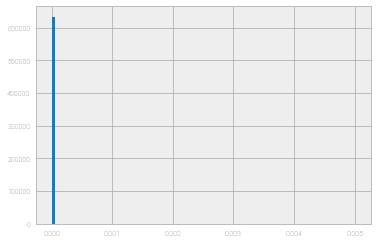

In [25]:
plt.hist(mutual_info,bins=100)

In [27]:
np.where(mutual_info == mutual_info.max())

(array([2977]),)

In [ ]:
stats.pearsonr(predictor_array_transformed[:,54],predictor_array_transformed[:,55])[0]

In [ ]:
plt.plot(predictor_array_transformed[:,62],Predictand,'o')

In [ ]:
df_sales_predictors.shape[0]

In [ ]:
range(df_sales_predictors.shape[0])

In [ ]:
pc_mat_1 = pc_mat_1[donde, :]

In [ ]:
pc_mat_1

In [ ]:
pc_mat_2 = pc_mat_2[donde, :]

In [ ]:
pc_mat_1[:,ii].shape

In [ ]:
pc_mat_2.shape[1]

In [ ]:
from scipy import stats

for ii in range(pc_mat_2.shape[1]-1):
    print(ii,' ', stats.pearsonr(pc_mat_2[:,ii],Predictand)[0])

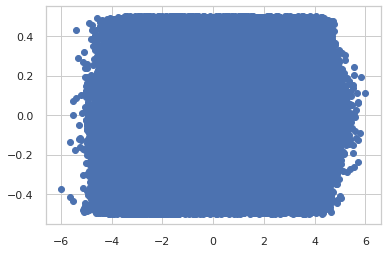

In [34]:
plt.plot(predictor_array_transformed[:,2977],Predictand,'o')

(array([[0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [5.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
         3.000e+00, 4.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 6.000e+00,
         7.000e+00, 8.000e+00, 7.000e+00, 1.000e+01, 6.000e+00, 2.000e+00,
         8.000e+00, 4.0

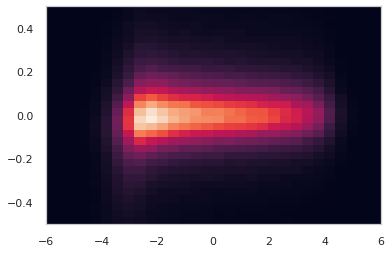

In [33]:
plt.hist2d(predictor_array_transformed[:,2977],Predictand,bins=30)

In [35]:
df_sales_predictors.columns[2977]

'clean_publicremarks_lemmatized_embeddings_354'

In [ ]:
plt.hist2d(pc_mat_1[:,0],Predictand,bins=30)

In [ ]:
plt.hist2d(pc_mat_2[:,3],Predictand,bins=30)

In [ ]:
pc_mat_2

In [ ]:
np.save('predictor_array_transformed.npy', predictor_array_transformed)

In [ ]:
np.save('pc_mat_1.npy', pc_mat_1)

In [ ]:
np.save('pc_mat_2.npy', pc_mat_2)

In [ ]:
np.save('Predictand.npy', Predictand)

In [ ]:
plt.hist(Predictand)